## Spike train analysis

In the wet lab this week you will study spikes, representing action potentials, in cockroach legs. Different types of sensory neurons respond to different stimuli, including pain, pressure, stretch, or chemicals. Cockroaches use their antennae and cerci to receive information from their environment. Each cercus is covered with a large number of long, sensitive, tactile hairs or "sensilla", which are a lot finer than the spines on the cockroach’s legs. A microscopic view of the hairs shows many specializations in size, shape, and spatial distribution, which allow these hairs to be stimulated by a variety of stimuli, including vibrations, air movements, and low frequency sound waves. The cockroach leg is studded with stiff hairs and spines. At the base of each spine is a single sensory neuron. The cell body of the neuron lies just under the cuticle of the spine, with the unbranched dendrite of the neuron projecting up through the overlying cuticle. In the wet lab we will apply pressure to individual spines using toothpicks to stimulate spiking. Here's an illustration of the experimental setup and a cockroach spine:
<!-- dom:FIGURE: [./figures/cockroach-intro-illustration.png, height=400 width=600 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="./figures/cockroach-intro-illustration.png" height=400 width=600>

<!-- end figure -->

In one of the exercises you are supposed to calculate the so-called inter-spike intervals (ISI) and use that to study adaptation. In the wet lab you will have a program that calculates the ISI and the frequency of firing for you, but here we will dig a bit more into how you find the ISI and what you can use it for.

In this assignment we will provide you with spike trains recorded in mouse primary visual cortex. One dataset is from a recording where the mouse was presented with a full field flash stimulus, and the other dataset is from a recording where the mouse was not presented with any stimulus - thus, during spontaneous activity. Even though it's a different animal and a different part of the nervous system, the scenario is analagous to the experiment you will do in the wet lab, where you will record during stimulation of a cockroach spines and during no stimulation and compare the spikes from the two conditions.

Below is an illustration of inter-spike intervals. The black lines mark the spikes and the red lines mark the ISI's. Here we have trials on the y-axis, but it could also be neurons.

<!-- dom:FIGURE: [./figures/isi-illustration.png, height=400 width=600 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="./figures/isi-illustration.png" height=400 width=600>

<!-- end figure -->

## Exercise 1: Load and look at spike trains data from recording during stimulus

**a)**

We will start by loading the spike trains from the recording flash stimulus period. The data are stored in a binary file with a **.npy format**. This means that you need numpy to read the data, so start by importing numpy. Then use the numpy load function (https://numpy.org/doc/stable/reference/generated/numpy.load.html) to read the data in the file named `spike_trains_flash.npy` into a variable named `spikes_stimulus`.

In [23]:
# import numpy here
import numpy as np

In [24]:
filename = 'spike_trains_flash.npy'
spikes_stimulus = np.load(filename)

The data is organised into the dimensions number of neurons, number of trials, and trial duration. You can check the size of each dimension running the cell below where it reads `spikes_stimulus.shape`.

In [26]:
spikes_stimulus.shape

(101, 75, 150)

**b)**

Hopefully the numbers 101, 75, and 150 popped up. That means that there are 110 neurons, recorded for 75 trials, each trial lasting 150 milliseconds in this dataset. The neurons are the first dimension, the trials are the second dimension, and the trial time points filled with 1's and 0's are the third dimension. 1 indicates a spike and 0 indicates no spike at that time point. For easier use later on, it can be advantageous to store these numbers for the dimensions in variables named `Nneurons`, `Ntrials`, and `trial_duration`. Fill in the blanks in the next cell to get the the number of neurons, number of trials, and trial duration from the shape of the array.

**Hint:** Put indeces at the end of `shape` to access only the number of trials, trial duration, or number of cells on each line.

In [4]:
Nneurons = __
Ntrials = ___
trial_duration = ___
Nneurons, Ntrials, trial_duration = spikes_stimulus.shape

**c)**

We start by taking a quick look at the data. Put the data from a single neuron into a variable that you name `spikes_stimulus_one_neuron` by accessing the cell at index "index_neuron" in the dataset `spikes_stimulus`. We've already selected a neuron index (`index_neuron = 85`) and started on the line of code you need to extract the spike trains of that one neuron and put it into a variable, so all you need to do is to fill in the blanks.

In [5]:
index_neuron = 85

#spikes_stimulus_one_neuron = ___
spikes_stimulus_one_neuron = spikes_stimulus[index_neuron]

**d)**

Next, we pick a single trial from the spike trains of that one neuron (`spikes_stimulus_one_neuron`) and put them in a variable named `spikes_stimulus_one_neuron_single_trial`. Fill in the blanks in the next cell to access the selected trial and put the spike train in the aforementioned variable.

In [6]:
index_trial = 2
#sts_stim_one_nrn_single_trial = ___
spikes_stimulus_one_neuron_single_trial = spikes_stimulus_one_neuron[index_trial]

**e)**

Let's plot the spike train for that selected trial and neuron. Import matplotlib.pyplot (or whichever plotting library you prefer, but keep in mind that you need to adapt the code in the plotting cells if you use a different one), and fill in the blanks to plot the spike train.

In [27]:
# import matplotlib here
import matplotlib.pyplot as plt

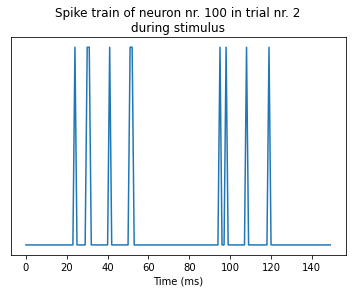

In [28]:
#plt.plot(___)
plt.plot(spikes_stimulus_one_neuron_single_trial)
plt.xlabel('Time (ms)')
plt.title('Spike train of neuron nr. '+str(index_neuron) + ' in trial nr. '+str(index_trial)+'\nduring stimulus')
plt.yticks([]);

#### Comment:
Observe in the plot above that some peaks are broader than the others (the peaks at around 30 and 50 ms f. ex.). That's because it's actually two spikes that are so close that they are plotted as one peak. Of course, it can happen that a neuron fires at a very high frequency, but in these cases the inter-spike interval is 1 ms, which is so small that in all likelihood one of the spikes comes from a different neuron in the vicinity of the recording electrode, and that spike has been mistakenly assigned to this neuron. This kind of pollution of the recorded signal can happen in your experiments too. It might show up as an increased amplitude of the action potential relative to other, non-polluted action potentials. In the plot below we have illustrated this for the neuron and trial selected from this dataset.

*No need to answer anything or add any code here, just run the next two cells and keep this in mind for the wet lab.*

In [29]:
from scipy.ndimage import gaussian_filter1d

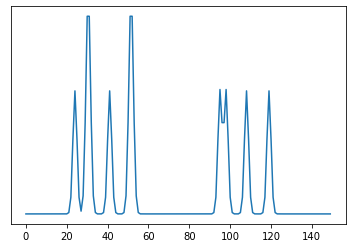

In [30]:
filtered_spikes_plot = gaussian_filter1d(spikes_stimulus_one_neuron_single_trial, sigma = 1)
plt.plot(filtered_spikes_plot)
plt.yticks([]);

## Exercise 2: Finding the inter-spike interval (ISI) and the rates of the selected neuron

Now we can find the ISI of the spike trains of that one neuron in the selected trial. To do that, we first need to convert the spike trains into timestamps. That means that we get an array containing the timepoints at which a spike occurred. We've done that for you here with the "numpy.where" function, which can be used to find the indeces where you find elements satisfying a certain condition (in this case, where there are 1's signifying spikes are in the array). It's possible to loop through the timestamps and find the time difference between subsequent spikes, but luckily, there is a function in numpy called "diff" that you can use instead.

**a)**

Fill in the blanks in the next cell to get the ISI of this neuron in the selected trial.



In [11]:
# first we convert the spike train array into an array of timestamps denoting when the spikes occured
ts_stimulus_one_neuron_single_trial = np.where(spikes_stimulus_one_neuron_single_trial == 1)[0]

# now we find the difference (the interval) between the spike timestamps and thus we get the ISI 
#ISI_stim_one_cell_single_trial = np.diff(___)
ISI_stimulus_one_neuron_single_trial = np.diff(ts_stimulus_one_neuron_single_trial)

# We print the ISI of the selected neuron in the selected trial. The intervals are given in milliseconds
ISI_stimulus_one_neuron_single_trial

array([ 6,  1, 10, 10,  1, 43,  3, 10, 11])

**b)**

Now we'll find the frequency of this cell from the ISI. That's done by taking the inverse of the ISI (that is, dividing by it). Fill in the blanks in the next cell.

In [12]:
#rate_stim_one_nrn_single_trial = (___)*1E3
rate_stimulus_one_neuron_single_trial = (1/ISI_stimulus_one_neuron_single_trial)*1E3 # multiply with 1E3 to scale to Hz

rate_stimulus_one_neuron_single_trial

array([ 166.66666667, 1000.        ,  100.        ,  100.        ,
       1000.        ,   23.25581395,  333.33333333,  100.        ,
         90.90909091])

## Exercise 3: Load and look at spike trains data from recording during spontaneous activity

Now we'll load the spike trains from the recording during spontaneous activity, which we'll use for comparison.

**a)**

Load the file `spike_trains_spontaneous.npy`into a variable named `spikes_spont`in the next cell (you can just copy the code from when you loaded spike trains above and adapt the filename and the variable name).

In [1]:
filename = 'spike_trains_spontaneous.npy'
spikes_spont = np.load(filename)

NameError: name 'np' is not defined

Let's just take a quick look at the spike trains for the same cell as above (no need to change anything, just run the cell below).

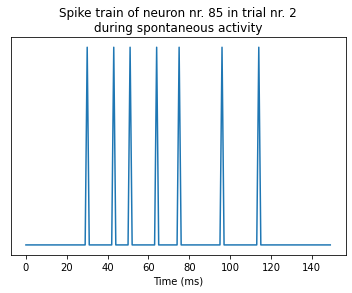

In [14]:
index_trial = 2
spikes_spont_one_neuron = spikes_spont[index_neuron]
spikes_spont_one_neuron_single_trial = spikes_spont_one_neuron[index_trial,:]
plt.plot(spikes_spont_one_neuron_single_trial)
plt.xlabel('Time (ms)')
plt.title('Spike train of neuron nr. '+str(index_neuron) + ' in trial nr. '+str(index_trial)+'\nduring spontaneous activity')
plt.yticks([]);

**b)**

Do you notice a difference in the firing pattern of this cell here during spontaneous firing compared to during stimulation above? Focus on the intervals and give a short (one sentence) qualitative description of the differences.

**Answer:** The spacing (intervals) between spikes is more regular during the spontaneous recording.

## Exercise 4:

Of course, just picking two spike trains from the two different conditions and comparing them qualitatively is not a proper analysis. You can always find spike trains that fit any story you would like to tell. Now, we'll loop through all cells and all trials and compute the ISI and the rates for every neuron, so that we can do a quantitative comparison of the firing patterns in the two conditions.

**a)**

Fill in the blanks in the cell below to create a function named `compute_rates_from_ISI` that you can use to calculate the ISI and the frequency of firing (rates). You can just copy and adapt the code you wrote for the single trial from a single neuron where appropriate.

In [32]:
def compute_rates_from_ISI(spikes):
    
    Nnrns, Ntrials, trial_dur = spikes.shape

    rates_all = list()

    ISI_all = list()
    ISI_by_neurons = list()

    for index_neuron in range(Nnrns):
        # looping through all neurons
        ISI_trials = list()
        for index_trial in range(Ntrials):
            # looping through all trials
            
            # converting spike train to timestamps
            ts = np.where(spikes[index_neuron, index_trial, :])[0] 

            if len(ts) < 2:
                # there are no or only one spike in this trial for this neuron, so the rate will be 1/(trial duration)
                rate = len(ts)/trial_dur
                rates_all.append(rate)
            else:
                # ISI = ___                   <----------- Code here
                ISI = np.diff(ts)
                # rates = ___                 <----------- Code here
                rates = 1/ISI
                for i, rate in enumerate(rates):
                    rates_all.append(rate)

                    ISI_all.append(ISI[i])
                    ISI_trials.append(ISI[i])

        ISI_by_neurons.append(ISI_trials)
        
    ISI_all = np.array(ISI_all)
    rates_all = np.array(rates_all)*1E3
    
    return rates_all, ISI_all, ISI_by_neurons

**b)**

In the next two cells, insert the spike trains data from the stimulus recording and the spontaneous activity recording, respectively, as the parameter to use the function above.

In [33]:
#rates_stim, ISI_stim, ISI_by_nrns_stim = compute_rates_from_ISI(___)
rates_stimulus, ISI_stimulus, ISI_by_neurons_stimulus = compute_rates_from_ISI(spikes_stimulus)

In [34]:
#rates_spont, ISI_spont, ISI_by_nrns_spont = compute_rates_from_ISI(___)
rates_spont, ISI_spont, ISI_by_neurons_spont = compute_rates_from_ISI(spikes_spont)

**c)**

Run the cell below to make histograms of firing rates in the two conditions (no need to add any code). What's the difference between the distribution of firing rates in the two conditions? What's the interpretation of this difference? Write your answer in the answer cell below.

**Answer:** The distribution of firing rates from the stimulus recording is shifted to the right, meaning that the firing rates are generally higher.

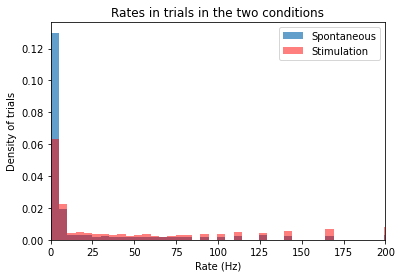

In [35]:
N = 201
bins = np.linspace(0,np.nanmax(rates_stimulus), N+1)

#plt.hist(___, bins = bins, alpha = 0.7, label = 'Spontaneous')
#plt.hist(___, bins = bins, alpha = 0.5, label = 'Stimulation', color = 'r')

plt.hist(rates_spont, bins = bins, alpha = 0.7, label = 'Spontaneous', density = True)
plt.hist(rates_stimulus, bins = bins, alpha = 0.5, label = 'Stimulation', color = 'r', density = True)

plt.xlim([0,200])
plt.xlabel('Rate (Hz)')
plt.ylabel('Density of trials')
plt.title('Rates in trials in the two conditions')
plt.legend()

## Exercise 5: Bursting, tonic, or Poisson firing?
One advantage of calculating the ISI is that you can determine whether the neuron is in a bursting mode, tonic mode, or Poisson firing mode. That's done by calculating the coefficient of variation squared ($CV^2$) according to this formula:

$$CV^2 = {{\sigma_{ISI}^{2}} \over {\mu_{ISI}^{2}}}$$

where $\sigma_{ISI}^{2}$ is the variability of the ISI and $\mu_{ISI}^{2}$ is the average ISI squared.

Here is an illustration of the tonic and bursting firing modes (figure from Neuronal Dynamics: From Single Neurons to Networks and Models of Cognition, Gerstner, Kistler, Naud, and Paninski).


<!-- dom:FIGURE: [./figures/tonic-bursting-illustration.png, height=400 width=600 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="./figures/tonic-bursting-illustration.png" height=400 width=600>

<!-- end figure -->


The interpretation of this number goes as follows: If $CV^2 = 0$, that means that there is **no variability** in the inter-spike intervals, hence, the neuron is in tonic firing mode - it fires at the exact same rhythm all the time. If $CV^2 = 1$, then the neuron is in a Poisson firing mode - there is no relationship between the intervals between spikes, the neuron fires at random. If $CV^2 > 1$, then the neuron is in bursting mode - there is a lot of variability in the firing intervals because in some periods the neuron fires a lot, so the intervals are very short, then it will (usually) begin to adapt and fire less and less, which means that the inter-spike intervals increase.

**a)**

We'll do a (somewhat coarse) analysis of whether the neurons are in a different mode during the stimulation compared to during spontaneous activity. Fill in the blanks with ISI_stim (inter-spike intervals for all neurons in the stimulus recording) and ISI_spont (inter-spike intervals for all neurons in the spontaneous activity recording) where appropriate in the cell below to calculate the $CV^2$ for ISI from all cells and trials in the two conditions.

In [36]:
#CVsq_stim = np.var(__)/np.mean(___)**2
#CVsq_spont = np.var(__)/np.mean(___)**2

CVsq_stim = np.var(ISI_stimulus)/np.mean(ISI_stimulus)**2
CVsq_spont = np.var(ISI_spont)/np.mean(ISI_spont)**2

print('During stimulation: CV^2 = ', np.round(CVsq_stim, 2))
print('During spontaneous activity: CV^2 = ', np.round(CVsq_spont, 2))

During stimulation: CV^2 =  1.31
During spontaneous activity: CV^2 =  1.02


**b)** 

Based on these results, what is the difference in firing modes in the two conditions?

**Answer:** The $CV^2$ for spontaneous activity indicates a Poisson firing mode, while the $CV^2$ for the stimulus recording suggests that the neurons are bursting more.

**c)** ***Optional:***

A more sophisticated analysis would be to compute $CV^2$ for each neuron in both conditions and do a statistical comparison of the distributions of $CV^2$-values from the two conditions. Fill in the blanks in the next cells to complete the code to get the distributions of $CV^2$-values and do the statistical test. Are the $CV^2$-values statistically different in the stimulus and spontaneous condition?

**Answer:**

In [20]:
CVsq_spont_neurons = list()
CVsq_stim_neurons = list()

for index_neuron in range(Nneurons): # <------ Code here
    if len(ISI_by_neurons_spont[index_neuron]) > 0 and len(ISI_by_neurons_stimulus[index_neuron]) > 0:
        #CVsq_spont_neurons.append(np.var(___)/np.mean(___)**2) # <--- Code here
        #CVsq_stim_neurons.append(np.var(___)/np.mean(___)**2) # <--- Code Here

        CVsq_spont_neurons.append(np.var(ISI_by_neurons_spont[index_neuron])/np.mean(ISI_by_neurons_spont[index_neuron])**2)
        CVsq_stim_neurons.append(np.var(ISI_by_neurons_stimulus[index_neuron])/np.mean(ISI_by_neurons_stimulus[index_neuron])**2)
        
CVsq_spont_neurons = np.array(CVsq_spont_neurons)
CVsq_stim_neurons = np.array(CVsq_stim_neurons)

Make boxplots of the distributions of $CV^2$ for the two conditions. (No need to add code in the next cell.)

Text(0.5, 1.0, 'Distribtions of CV$^2$')

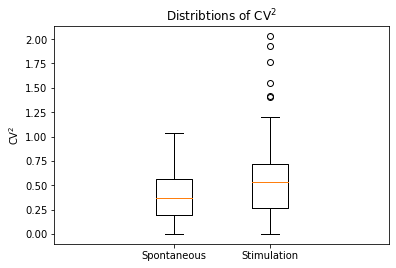

In [21]:
plt.boxplot([CVsq_spont_neurons, CVsq_stim_neurons], positions = [0.8, 1.2]);
plt.xticks([0.8,1.2], ['Spontaneous', 'Stimulation'])
plt.ylabel('CV$^2$')
plt.title('Distribtions of CV$^2$')

Fill in the blanks in the next cell to do a Kolmogorov-Smirnov statistical test (KS-test) to find out if the two distributions are statistically different if we set p<0.05 as the criterion for statistical significance.

In [22]:
from scipy import stats
#ks_dist, p = stats.ks_2samp(___, ___)
ks_dist, p = stats.ks_2samp(CVsq_spont_neurons, CVsq_stim_neurons)
print('p = '+str(p))

p = 0.012071814151101576
